In [6]:
!pip install tensorflow


In [4]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [6]:
TRAIN_DIR = "imageDatabase/train"
TEST_DIR = "imageDatabase/test"
BATCH_SIZE=64     

In [8]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 1896 in folder Anger
For training data, found 1891 in folder Disgust
For training data, found 1922 in folder Fear
For training data, found 1922 in folder Happiness
For training data, found 1922 in folder Sadness
For training data, found 1922 in folder Surprise


In [10]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 237 in folder Anger
For testing data, found 237 in folder Disgust
For testing data, found 241 in folder Fear
For testing data, found 241 in folder Happiness
For testing data, found 241 in folder Sadness
For testing data, found 241 in folder Surprise


In [12]:
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
   
    target_folder = target_dir + '/' + target_class 
    
   
    random_image = random.sample(os.listdir(target_folder), 1)  # Fixed 'od' to 'os'
    
   
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape: {img.shape}")
    
    return img


In [14]:
class_names = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']

Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)


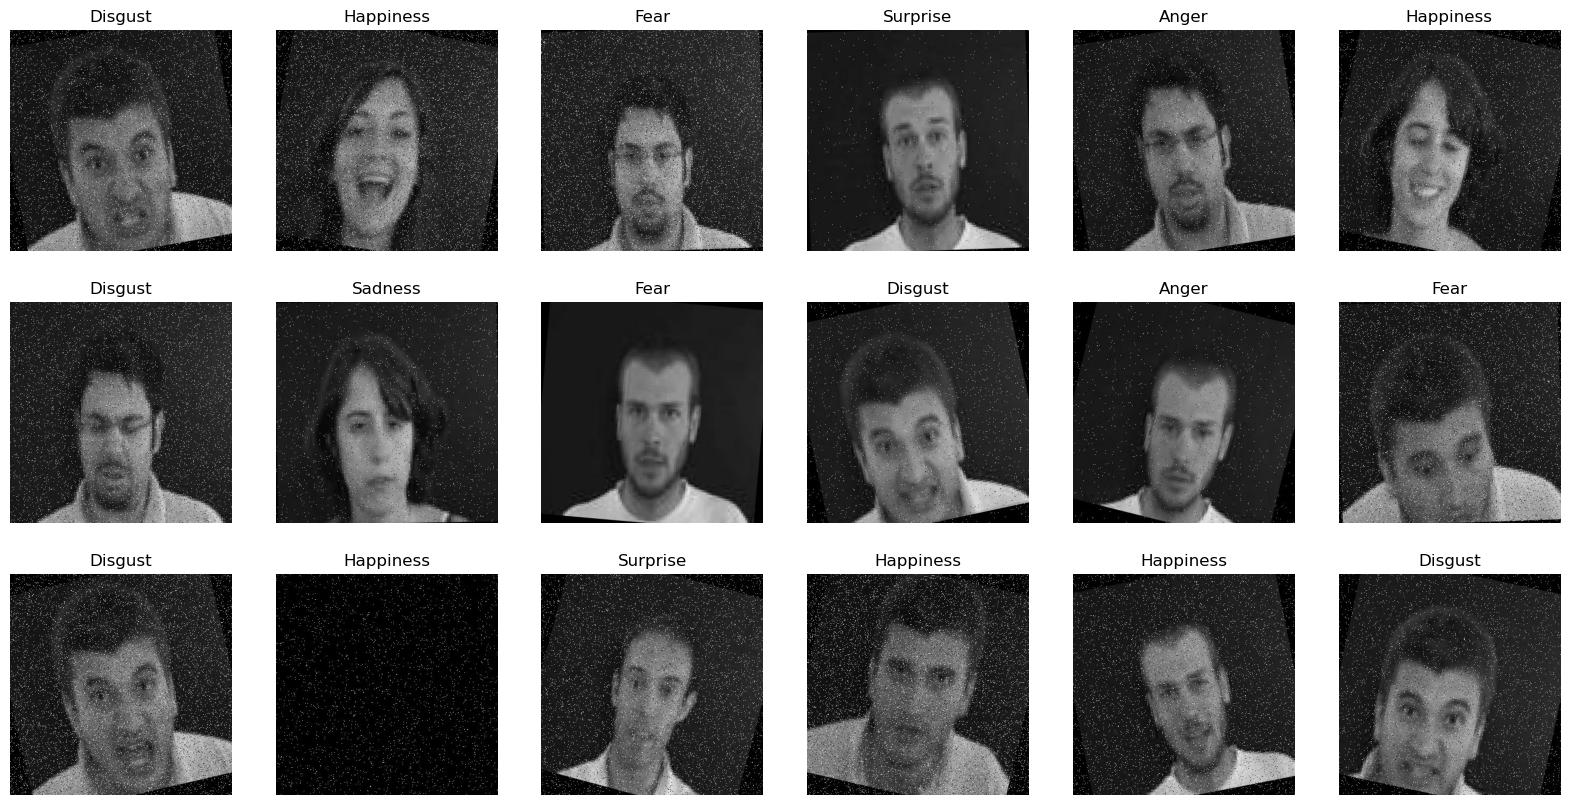

In [16]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="imageDatabase/train", target_class=class_name)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Correct import

# Data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True
)

# Only rescaling for test images
test_datagen = ImageDataGenerator(rescale=1./255)

# Preparing the training set
training_set = train_datagen.flow_from_directory(
    TRAIN_DIR,  # Make sure TRAIN_DIR is properly set to the local directory
    target_size=(128, 128),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Preparing the test set
test_set = test_datagen.flow_from_directory(
    TEST_DIR,  # Make sure TEST_DIR is properly set to the local directory
    target_size=(128, 128),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 11475 images belonging to 6 classes.
Found 1438 images belonging to 6 classes.


In [20]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 6, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

C:\Users\pavani\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
## model summary
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,692,390 (14.09 MB)

 Trainable params: 3,692,390 (14.09 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = classifier.fit(training_set,
                         epochs = 50,
                         validation_data = test_set)


classifier.save('model1.h5')

Epoch 1/50


C:\Users\pavani\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


180/180 ━━━━━━━━━━━━━━━━━━━━ 163s 859ms/step - accuracy: 0.1652 - loss: 1.9064 - val_accuracy: 0.2364 - val_loss: 1.7796
Epoch 2/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 149s 798ms/step - accuracy: 0.2620 - loss: 1.7471 - val_accuracy: 0.3095 - val_loss: 1.6892
Epoch 3/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 106s 564ms/step - accuracy: 0.3372 - loss: 1.6215 - val_accuracy: 0.3957 - val_loss: 1.4801
Epoch 4/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 83s 451ms/step - accuracy: 0.4164 - loss: 1.4565 - val_accuracy: 0.4590 - val_loss: 1.3279
Epoch 5/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 74s 400ms/step - accuracy: 0.4630 - loss: 1.3440 - val_accuracy: 0.5299 - val_loss: 1.2050
Epoch 6/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 74s 397ms/step - accuracy: 0.5262 - loss: 1.2025 - val_accuracy: 0.5369 - val_loss: 1.1858
Epoch 7/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 75s 404ms/step - accuracy: 0.5756 - loss: 1.0904 - val_accuracy: 0.5772 - val_loss: 1.1394
Epoch 8/50
180/180 ━━━━━━━━━━━━━━━━━━━━ 80s 433ms/step - accuracy: 0.6003 - loss: 1.0204 - 

In [27]:
classifier.evaluate(test_set)

23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 317ms/step - accuracy: 0.8167 - loss: 0.4867


[0.4877982437610626, 0.8205841183662415]

Text(0, 0.5, 'Loss')

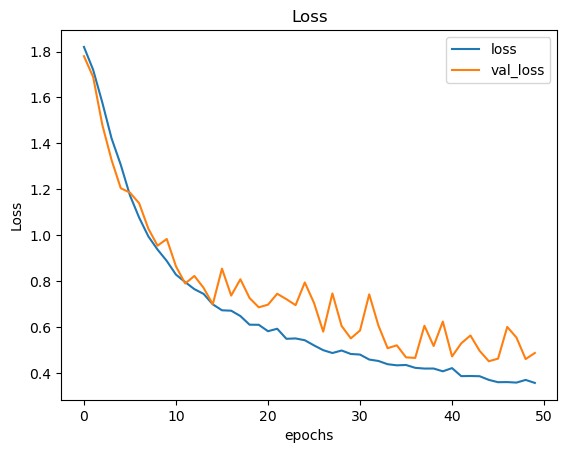

In [29]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

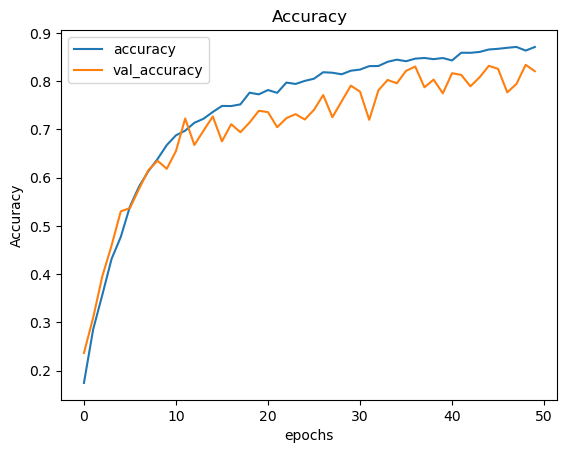

In [31]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [33]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

# Load your model
model_path = "model1.h5"
loaded_model = keras.models.load_model(model_path)

# Load the image
image = cv2.imread("C:\\Users\\pavani\\MultiMedia_SentimentAnalysis\\imageDatabase\\test\\Fear\\myvideo_frames5_jpg.rf.9692a0ea34ead79e860a3b6eac3e7200.jpg")


# Check if the image was loaded successfully
if image is None:
    print("Error: Image not loaded. Check the file path.")
else:
    # Convert BGR to RGB (OpenCV loads images as BGR by default)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Convert to PIL Image
    image_fromarray = Image.fromarray(image, 'RGB')
    
    # Resize the image to the required input size
    resize_image = image_fromarray.resize((128, 128))
    
    # Expand dimensions to match the model input (batch size, height, width, channels)
    expand_input = np.expand_dims(resize_image, axis=0)
    
    # Normalize the input data
    input_data = np.array(expand_input) / 255.0
    
    # Make prediction
    pred = loaded_model.predict(input_data)
    
    # Get the index of the class with the highest prediction probability
    result = pred.argmax()
    
    print("Prediction result:", result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
Prediction result: 2


In [35]:
training_set.class_indices

{'Anger': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happiness': 3,
 'Sadness': 4,
 'Surprise': 5}

Testing the project using images to deploye!

In [42]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Define your class names
class_names = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise']

# Load your image (ensure the path is correct)
img = image.load_img(r"C:\Users\pavani\OneDrive\Pictures\New folder\r1.jpg", target_size=(128, 128))  # Resize to match your training input size

# Convert the image to an array
img_array = image.img_to_array(img)

# Rescale the image (similar to the rescaling done during training)
img_array = img_array / 255.0

# Expand dimensions to simulate a batch of size 1 (since the model expects batches)
img_array = np.expand_dims(img_array, axis=0)

# Make a prediction
prediction = classifier.predict(img_array)

# Print the raw prediction (probability distribution)
print(f"Prediction: {prediction}")

# Get the index of the predicted class
predicted_class_index = np.argmax(prediction, axis=1)

# Use the class index to get the emotion label
predicted_class_name = class_names[predicted_class_index[0]]

# Print the predicted emotion
print(f"Predicted Emotion: {predicted_class_name}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction: [[1. 0. 0. 0. 0. 0.]]
Predicted Emotion: Anger


In [ ]:
"C:\Users\pavani\OneDrive\Pictures\3C8A6808.JPG"

from tensorflow.keras.preprocessing import image
import numpy as np

# Define your class names
class_names = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise']

# Load your image (ensure the path is correct)
img = image.load_img(r"C:\Users\pavani\OneDrive\Pictures\New folder\r1.jpg", target_size=(128, 128))  # Resize to match your training input size

# Convert the image to an array
img_array = image.img_to_array(img)

# Rescale the image (similar to the rescaling done during training)
img_array = img_array / 255.0

# Expand dimensions to simulate a batch of size 1 (since the model expects batches)
img_array = np.expand_dims(img_array, axis=0)

# Make a prediction
prediction = classifier.predict(img_array)

# Print the raw prediction (probability distribution)
print(f"Prediction: {prediction}")

# Get the index of the predicted class
predicted_class_index = np.argmax(prediction, axis=1)

# Use the class index to get the emotion label
predicted_class_name = class_names[predicted_class_index[0]]

# Print the predicted emotion
print(f"Predicted Emotion: {predicted_class_name}")
